In [1]:
import librosa
import librosa.display
import pandas as pd
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from pathlib import Path
from pylab import rcParams
rcParams['figure.figsize'] = 14, 6

import csv

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')


## Reading audio samples

In [2]:
sr = 16000
e_file1 = 'BLKFR-10-CPL_20190611_093000.pt540.mp3'
e_file2 = 'ORANGE-7-CAP_20190606_093000.pt623.mp3'

# 10 seconds of each file
y1,sr = librosa.load(e_file1, mono=True, sr=sr, offset=0, duration=10)
y2,sr = librosa.load(e_file2, mono=True, sr=sr, offset=0, duration=10)

In [3]:
from IPython.display import Audio, IFrame, display

display(Audio(y1,rate=sr))
display(Audio(y2,rate=sr))

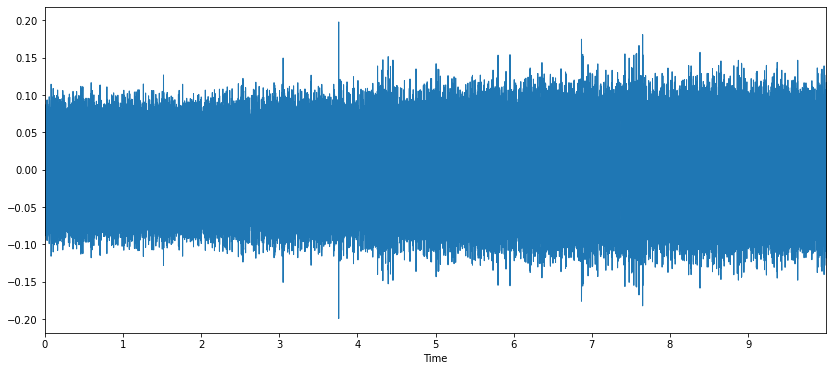

In [4]:
librosa.display.waveplot(y1,sr=sr, x_axis='time');

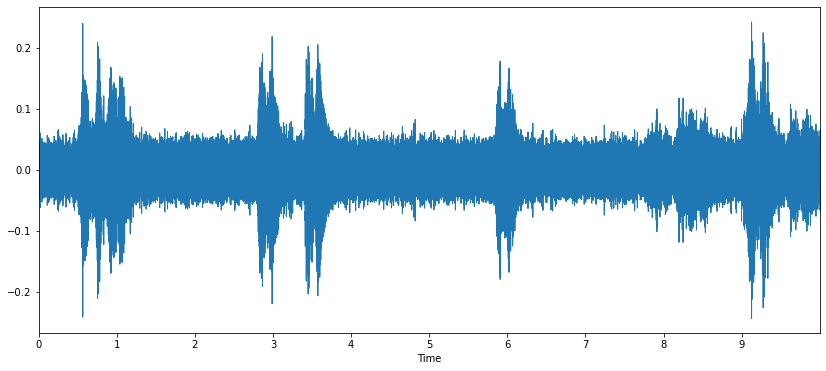

In [5]:
librosa.display.waveplot(y2,sr=sr, x_axis='time');

## Logmel-spectogram

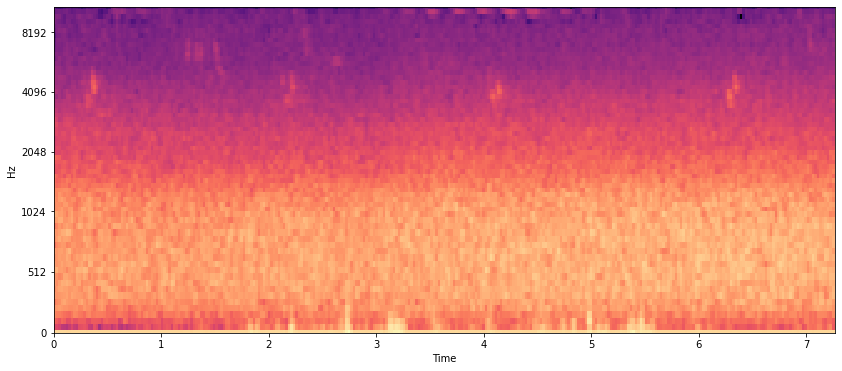

In [6]:
S1 = librosa.feature.melspectrogram(y=y1, sr=sr, n_mels=64)
D1 = librosa.power_to_db(S1, ref=np.max)
librosa.display.specshow(D1, x_axis='time', y_axis='mel');

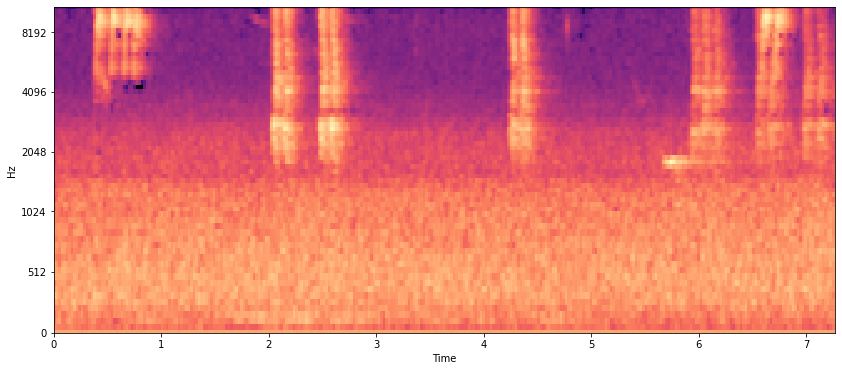

In [7]:
S2 = librosa.feature.melspectrogram(y=y2, sr=sr, n_mels=64)
D2 = librosa.power_to_db(S2, ref=np.max)
librosa.display.specshow(D2, x_axis='time', y_axis='mel');

## Filtering low-frequencies

In [8]:
from scipy import signal
import random


def f_high(y,sr):
    b,a = signal.butter(10, 2000/(sr/2), btype='highpass')
    yf = signal.lfilter(b,a,y)
    return yf


In [9]:
yf1 = f_high(y1, sr)
yf2 = f_high(y2, sr)

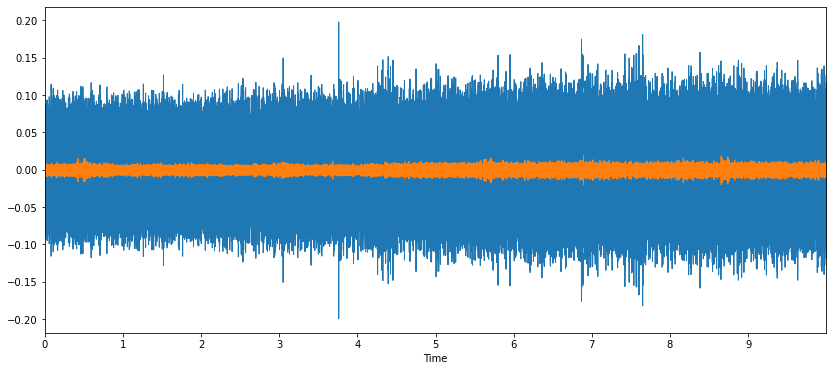

In [10]:
librosa.display.waveplot(y1,sr=sr, x_axis='time');
librosa.display.waveplot(yf1,sr=sr, x_axis='time');

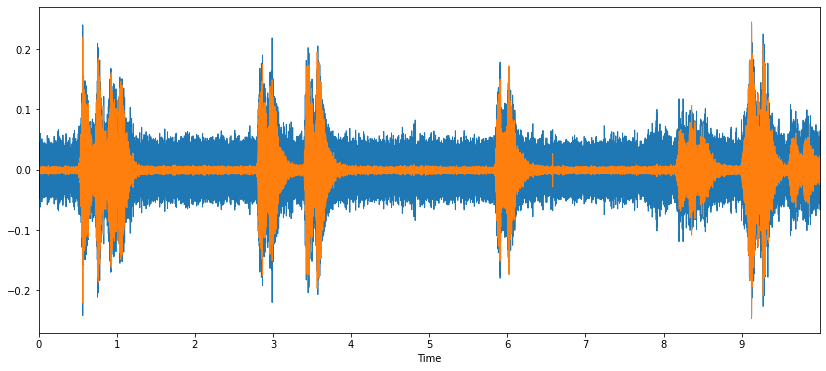

In [11]:
librosa.display.waveplot(y2,sr=sr, x_axis='time');
librosa.display.waveplot(yf2,sr=sr, x_axis='time');

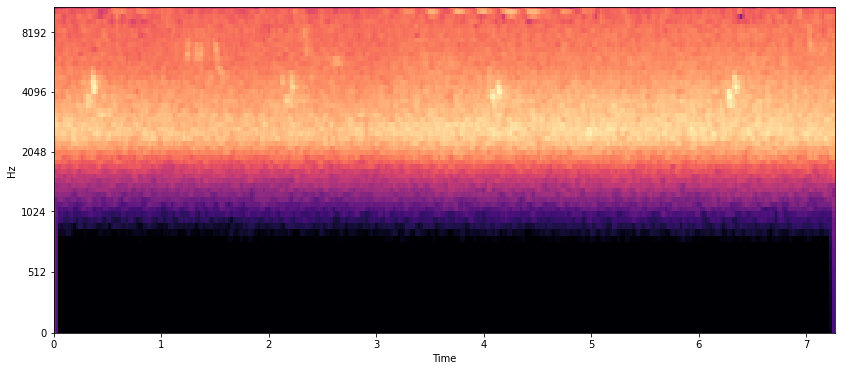

In [12]:
Sf1 = librosa.feature.melspectrogram(y=yf1, sr=sr, n_mels=64)
Df1 = librosa.power_to_db(Sf1, ref=np.max)
librosa.display.specshow(Df1, x_axis='time', y_axis='mel');

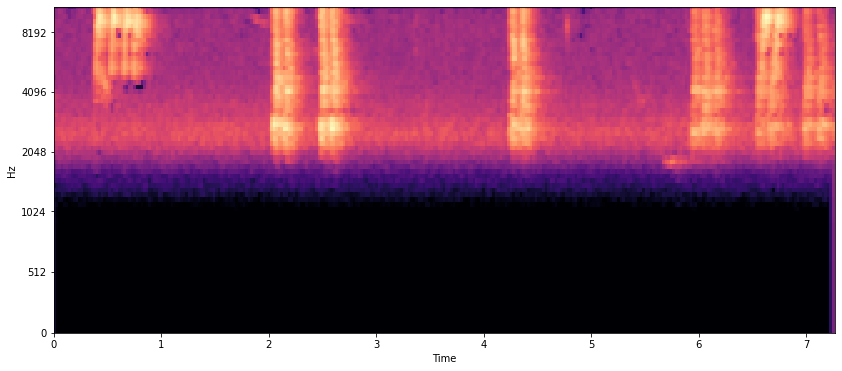

In [13]:
Sf2 = librosa.feature.melspectrogram(y=yf2, sr=sr, n_mels=64)
Df2 = librosa.power_to_db(Sf2, ref=np.max)
librosa.display.specshow(Df2, x_axis='time', y_axis='mel');

In [14]:
display(Audio(yf1,rate=sr))
display(Audio(yf2,rate=sr))

## PCEN

In [15]:
Dp1 = librosa.pcen(S1 * (2**31), sr=sr, gain=1.1, hop_length=512, bias=2, power=0.5, time_constant=0.8, eps=1e-06, max_size=2)
Dp2 = librosa.pcen(S2 * (2**31), sr=sr, gain=1.1, hop_length=512, bias=2, power=0.5, time_constant=0.8, eps=1e-06, max_size=2)

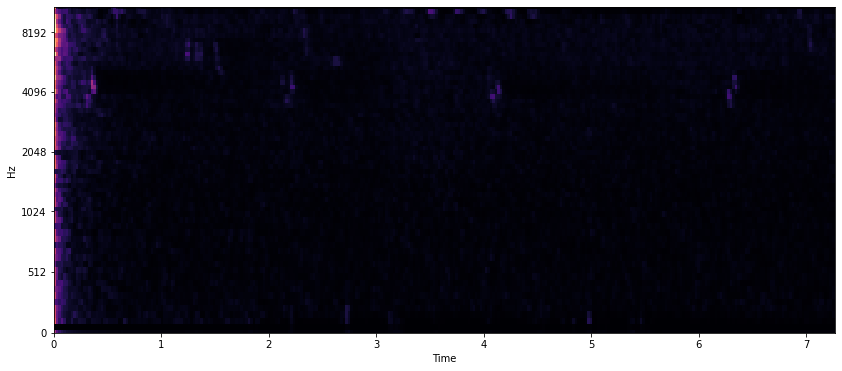

In [16]:
librosa.display.specshow(Dp1, x_axis='time', y_axis='mel');

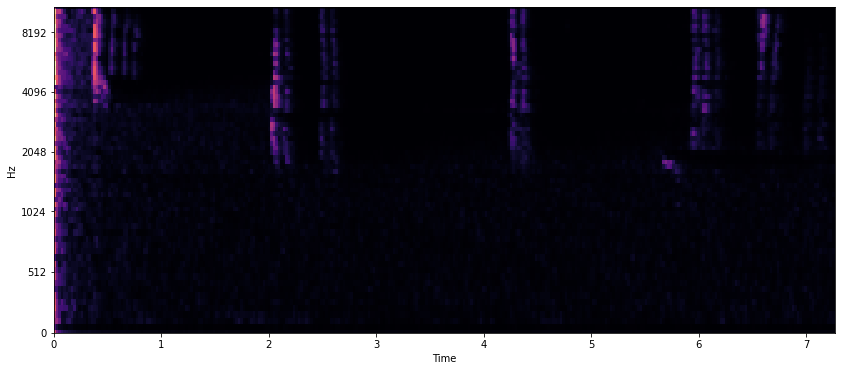

In [17]:
librosa.display.specshow(Dp2, x_axis='time', y_axis='mel');

In [18]:
yp1 = librosa.feature.inverse.mel_to_audio(Dp1)
yp2 = librosa.feature.inverse.mel_to_audio(Dp2)

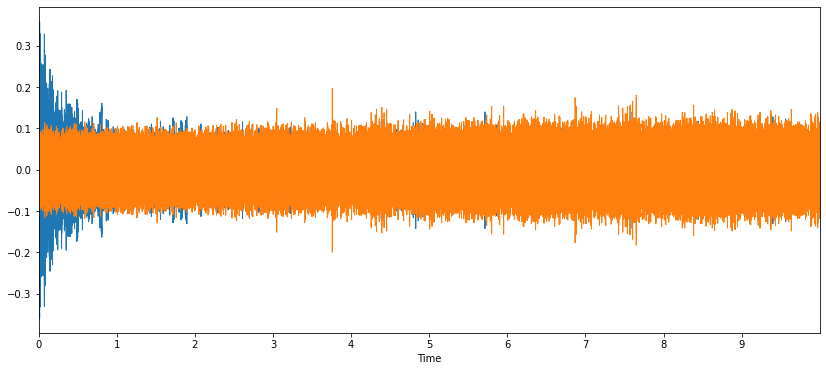

In [19]:
librosa.display.waveplot(yp1,sr=sr, x_axis='time');
librosa.display.waveplot(y1,sr=sr, x_axis='time');

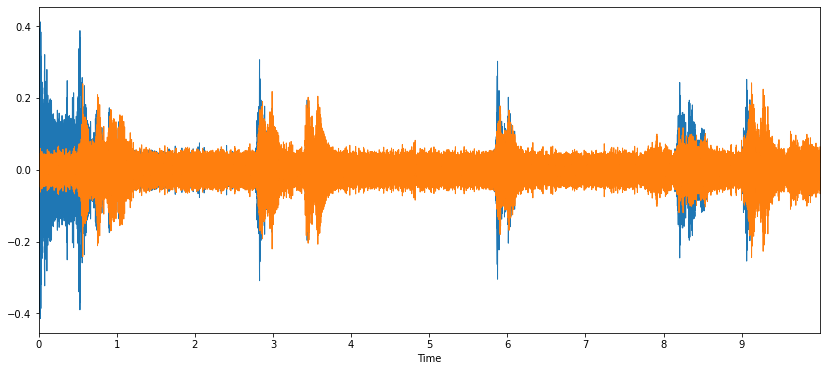

In [20]:
librosa.display.waveplot(yp2,sr=sr, x_axis='time');
librosa.display.waveplot(y2,sr=sr, x_axis='time');

In [21]:
display(Audio(yp1,rate=sr))
display(Audio(yp2,rate=sr))